In [11]:
import numpy as np
import pickle
import pandas as pd
import os
import sacc
import yaml
import matplotlib.pyplot as plt
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rc('legend',fontsize=18)

In [15]:
class cl_ensemble(object):
    def __init__(self, s, y):

        # Apply scale cuts
        self._apply_scale_cuts(s, y)

        self.indices = np.array([])
        self.data = []
        self.ls = []
        self.pairs = []
        for cl in y["order"]:
            t1, t2 = cl["tracers"]
            cls = cl["cls"]
            for cl_name in cls:
                l, c_ell, ind = s.get_ell_cl(
                    cl_name, t1, t2,
                    return_cov=False,
                    return_ind=True)
                self.indices = np.append(self.indices, ind)
                self.data.append(c_ell)
                self.ls.append(l)
                self.pairs.append([t1, t2])
        
        self.indices = self.indices.astype(int)
        self.cov = s.covariance.dense
        self.cov = np.transpose(np.transpose(self.cov[self.indices])[self.indices])
        lengths = [len(l) for l in self.ls]
        self.idx  = np.cumsum(lengths)

    def _apply_scale_cuts(self, s, y):
        indices = np.array([])
        for cl in y["order"]:
            t1, t2 = cl["tracers"]
            cls = cl["cls"]
            if "ell_cuts" in list(cl.keys()):
                lmin, lmax = cl["ell_cuts"]
                for cl_name in cls:
                    ind = s.indices(cl_name, (t1, t2),
                                    ell__gt=lmin, ell__lt=lmax)
                    indices = np.append(indices, ind)
        if len(indices) != 0:
            s.keep_indices(indices)

In [16]:
s = sacc.Sacc.load_fits("/home/jaimerz/Documents/UCL/3x2_analytical/data/HSC/HSC.sacc")
y = yaml.load(open("/home/jaimerz/Documents/UCL/3x2_analytical/data/HSC/HSC.yml"), Loader=yaml.FullLoader)

In [17]:
cle = cl_ensemble(s,y)

In [25]:
wanted_pairs = cle.pairs[:10] 
wanted_pairs

[['lens_0', 'lens_0'],
 ['lens_1', 'lens_0'],
 ['lens_1', 'lens_1'],
 ['lens_2', 'lens_0'],
 ['lens_2', 'lens_1'],
 ['lens_2', 'lens_2'],
 ['lens_3', 'lens_0'],
 ['lens_3', 'lens_1'],
 ['lens_3', 'lens_2'],
 ['lens_3', 'lens_3']]

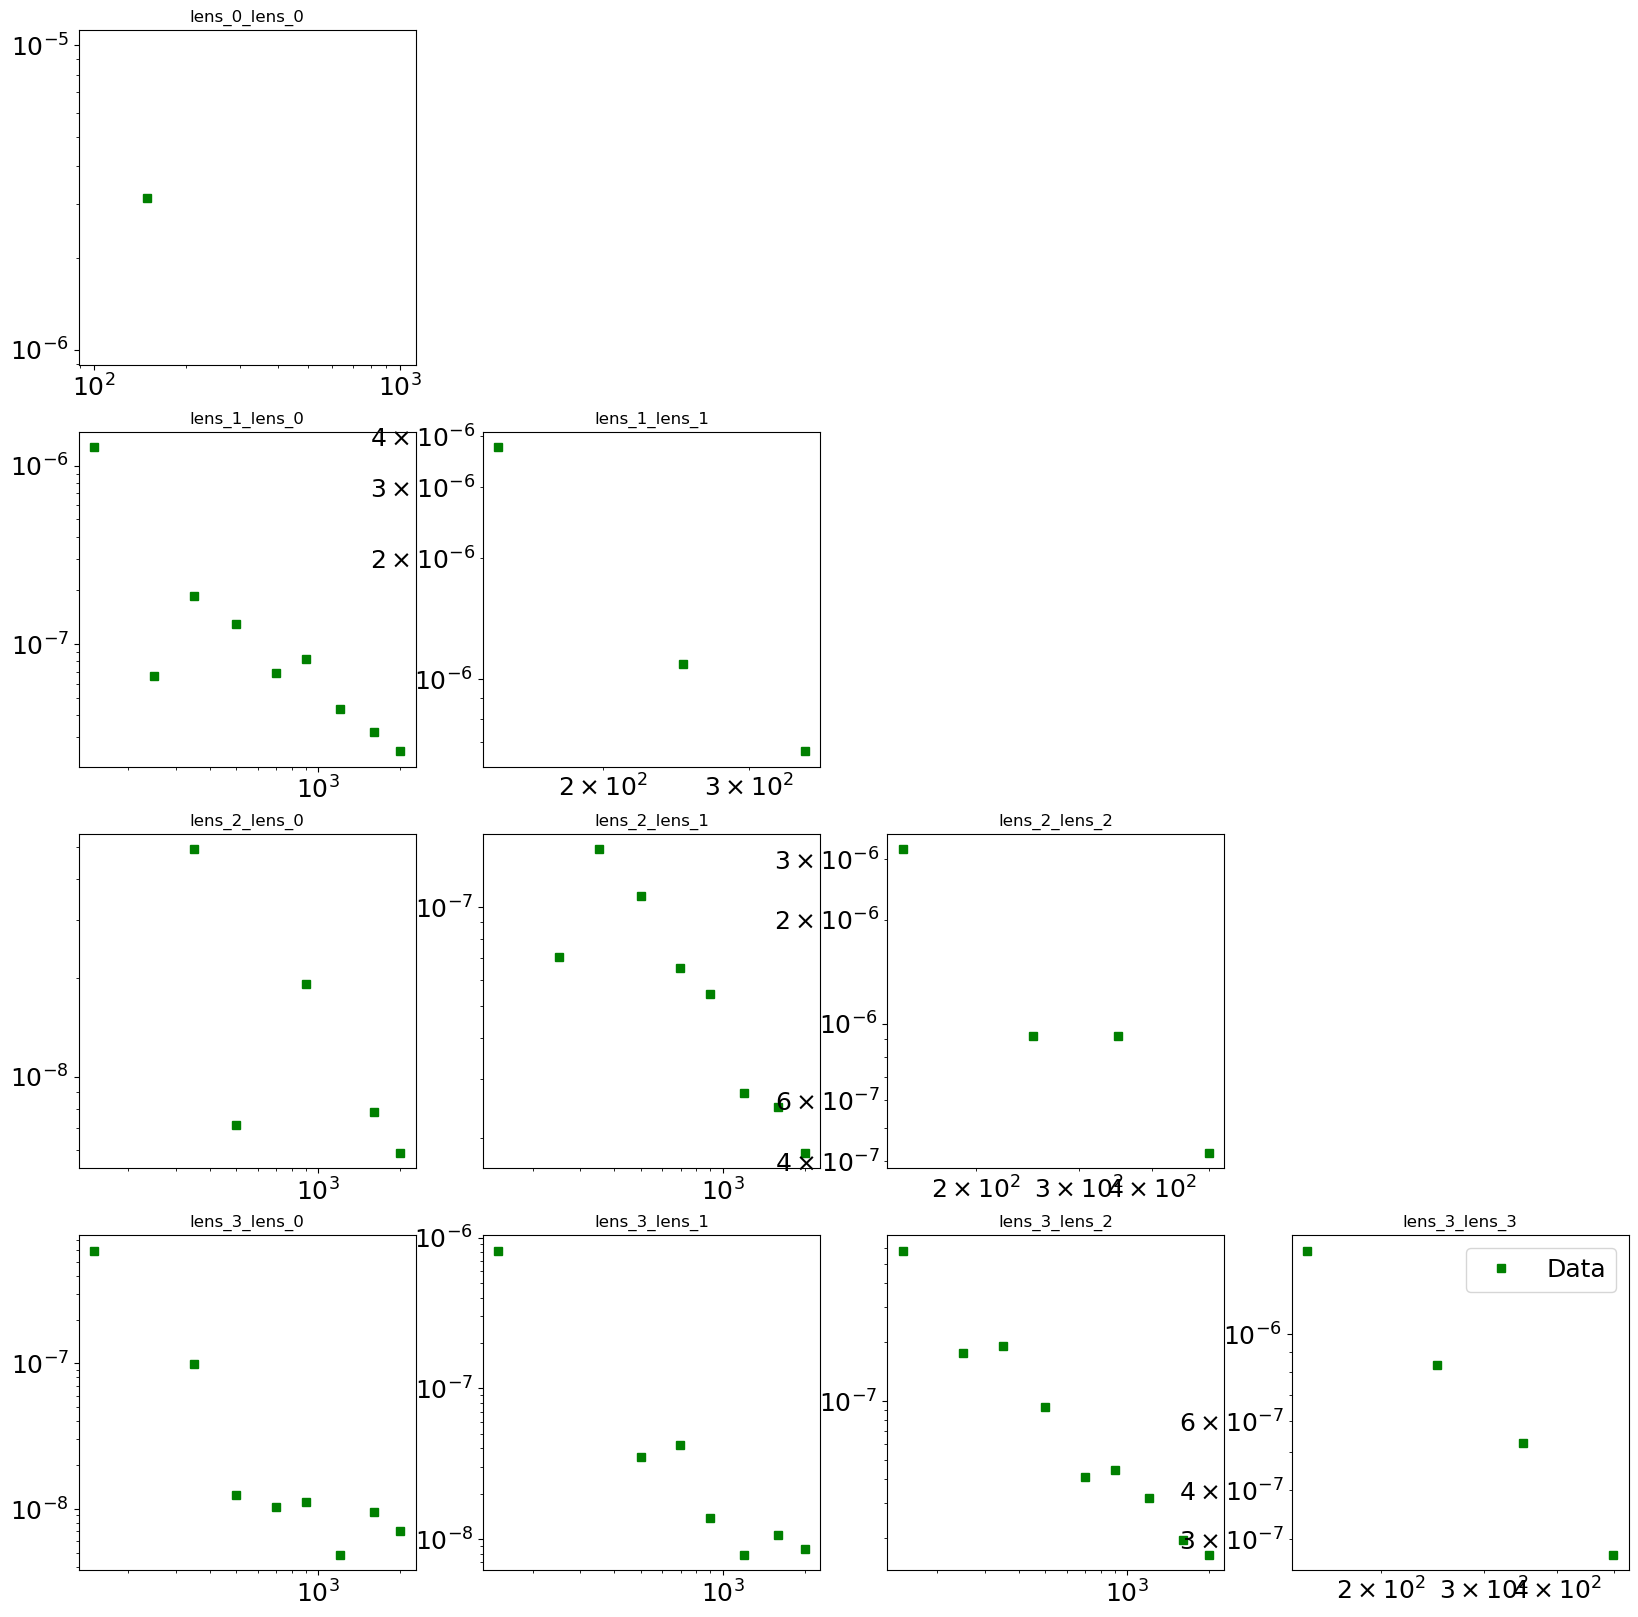

In [44]:

pairs_pos = [cle.pairs.index(pair) for pair in wanted_pairs]
unique_t_i = np.unique(np.transpose(wanted_pairs)[0])
unique_t_j = np.unique(np.transpose(wanted_pairs)[1])
l_t_i = len(unique_t_i)
l_t_j = len(unique_t_j)
npair = 0
figure, axis = plt.subplots(l_t_i, l_t_j, figsize=(5*l_t_i, 5*l_t_j))
for i in range(0, l_t_i):
    for j in range(0, l_t_j):
        proposed_pair = [unique_t_i[i], unique_t_j[j]]
        if proposed_pair in wanted_pairs:
            pos = pairs_pos[npair]
            ls = cle.ls[pos]
            data = cle.data[pos]
            axis[i, j].errorbar(ls, data, fmt='gs', label='Data')
            axis[i, j].set_title("{}_{}".format(proposed_pair[0],proposed_pair[1]))
            axis[i, j].set_xscale("log")
            axis[i, j].set_yscale("log")
            npair += 1
        else:
            axis[i, j].axis('off')
plt.legend()
plt.show()

In [ ]:
class cl_plotter(object):
    def __init__(self, cle; wanted_pairs=nothing):
        self.clp = clp

In [187]:
clp.data

[array([3.13885302e-06]),
 array([1.27335899e-06, 6.62186345e-08, 1.86535570e-07, 1.29212841e-07,
        6.85231731e-08, 8.18812966e-08, 4.29636455e-08, 3.20719466e-08,
        2.49683138e-08]),
 array([3.76254307e-06, 1.09051878e-06, 6.63333745e-07]),
 array([-1.98036902e-07, -2.86472641e-08,  4.92594988e-08,  7.13284200e-09,
        -6.18796692e-09,  1.91153803e-08, -3.11888776e-10,  7.79916394e-09,
         5.85509259e-09]),
 array([-1.00728400e-07,  7.03081008e-08,  1.49826268e-07,  1.08073879e-07,
         6.53308176e-08,  5.45852847e-08,  2.73642387e-08,  2.48392004e-08,
         1.79493150e-08]),
 array([3.20874221e-06, 9.19330987e-07, 9.21940533e-07, 4.21591959e-07]),
 array([ 5.96611981e-07, -1.15606596e-07,  9.87288526e-08,  1.25113278e-08,
         1.02126265e-08,  1.12047717e-08,  4.82084438e-09,  9.46660860e-09,
         7.05625452e-09]),
 array([ 8.20840734e-07, -1.11429879e-09, -1.15363665e-08,  3.52345379e-08,
         4.23179414e-08,  1.37240833e-08,  7.86231164e-09, 

In [85]:
idx = [int(i) for i in data['indices']]

In [88]:
cov = s.covariance.dense
cov = np.transpose(np.transpose(cov[idx])[idx])
cov

array([[ 9.07281942e-13,  5.15640550e-15, -8.29379528e-16, ...,
         1.29721605e-18,  9.21858365e-19,  6.08214308e-19],
       [ 5.15640550e-15,  3.36246729e-13, -5.41601729e-14, ...,
        -7.49892440e-20, -5.58193880e-20, -3.71468259e-20],
       [-8.29379528e-16, -5.41601729e-14,  5.11761603e-14, ...,
        -5.16969455e-21, -2.12266339e-21, -1.88700305e-21],
       ...,
       [ 1.29721605e-18, -7.49892440e-20, -5.16969455e-21, ...,
         4.65029377e-20, -9.39606370e-22,  4.55151768e-22],
       [ 9.21858365e-19, -5.58193880e-20, -2.12266339e-21, ...,
        -9.39606370e-22,  1.46968255e-20, -3.09552714e-22],
       [ 6.08214308e-19, -3.71468259e-20, -1.88700305e-21, ...,
         4.55151768e-22, -3.09552714e-22,  1.00306380e-20]], dtype='>f8')